# Week 5: The Resistor Problem and Laplace Equation

The .py file contains the entire code. <br>
Expected Usage: $python3 filename.py Nx Ny radius Niter <br>
Nx is the number of points along X direction <br>
Ny is the number of points along Y direction <br>
radius is the radius of the cross section of soldered wire <br>
Niter is the number of iterations needed to be performed <br>
If no arguments are passed default values are chosen

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [216]:
import scipy.linalg as slg

In [217]:
#Command line args
Nx = 25
Ny = 25
radius = 8
Niter = 1500

In [218]:
phi = np.zeros((Ny,Nx))

In [219]:
x = np.arange(Nx) - (Nx-1)/2
y = np.flip(np.arange(Ny) - (Ny-1)/2)
X,Y = np.meshgrid(x,y)
ii = np.where(X*X + Y*Y <= radius**2)
phi[ii] =1

In [220]:
x

array([-12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.])

In [221]:
X**2 + Y**2

array([[288., 265., 244., 225., 208., 193., 180., 169., 160., 153., 148.,
        145., 144., 145., 148., 153., 160., 169., 180., 193., 208., 225.,
        244., 265., 288.],
       [265., 242., 221., 202., 185., 170., 157., 146., 137., 130., 125.,
        122., 121., 122., 125., 130., 137., 146., 157., 170., 185., 202.,
        221., 242., 265.],
       [244., 221., 200., 181., 164., 149., 136., 125., 116., 109., 104.,
        101., 100., 101., 104., 109., 116., 125., 136., 149., 164., 181.,
        200., 221., 244.],
       [225., 202., 181., 162., 145., 130., 117., 106.,  97.,  90.,  85.,
         82.,  81.,  82.,  85.,  90.,  97., 106., 117., 130., 145., 162.,
        181., 202., 225.],
       [208., 185., 164., 145., 128., 113., 100.,  89.,  80.,  73.,  68.,
         65.,  64.,  65.,  68.,  73.,  80.,  89., 100., 113., 128., 145.,
        164., 185., 208.],
       [193., 170., 149., 130., 113.,  98.,  85.,  74.,  65.,  58.,  53.,
         50.,  49.,  50.,  53.,  58.,  65.,  74.,  

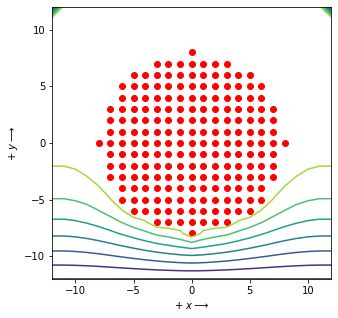

In [238]:
fig,ax = plt.subplots(figsize=(5,5),num =0)
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
ax.contour(X,Y,phi)
ax.scatter(ii[1]-(Nx-1)/2,ii[0]-(Ny-1)/2,marker = 'o', color ='r')


In [223]:
errors = np.zeros(Niter)
for k in range(Niter):
    oldphi = phi.copy()
    phi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2] + phi[1:-1,2:] + phi[0:-2,1:-1] + phi[2:,1:-1])
    phi[ii] =1
    phi[1:-1,0] = phi[1:-1,1]
    phi[1:-1,-1] = phi[1:-1,-2]
    phi[0,1:-1] = phi[1,1:-1]
    errors[k] = np.max(np.abs(phi-oldphi))

In [224]:
phi

array([[0.        , 0.99607632, 0.99623869, 0.99654288, 0.99695153,
        0.99741727, 0.99789119, 0.9983312 , 0.99870811, 0.99900653,
        0.99922041, 0.99935017, 0.99939489, 0.99935017, 0.99922041,
        0.99900653, 0.99870811, 0.9983312 , 0.99789119, 0.99741727,
        0.99695153, 0.99654288, 0.99623869, 0.99607632, 0.        ],
       [0.99607632, 0.99607632, 0.99623869, 0.99654288, 0.99695153,
        0.99741727, 0.99789119, 0.9983312 , 0.99870811, 0.99900653,
        0.99922041, 0.99935017, 0.99939489, 0.99935017, 0.99922041,
        0.99900653, 0.99870811, 0.9983312 , 0.99789119, 0.99741727,
        0.99695153, 0.99654288, 0.99623869, 0.99607632, 0.99607632],
       [0.99591395, 0.99591395, 0.99609688, 0.99643842, 0.99689444,
        0.9974091 , 0.99792509, 0.9983943 , 0.99878661, 0.99909107,
        0.99930453, 0.99943521, 0.99948432, 0.99943521, 0.99930453,
        0.99909107, 0.99878661, 0.9983943 , 0.99792509, 0.9974091 ,
        0.99689444, 0.99643842, 0.99609688, 0.

In [225]:
i = np.arange(1,Niter+1)
one_array = np.ones(Niter)
M = np.c_[one_array,i]
M_500 = np.c_[one_array[500:],i[500:]]
v = slg.lstsq(M,np.log(errors))[0]
v_500 = slg.lstsq(M_500,np.log(errors[500:]))[0]

In [226]:
errors

array([5.00000000e-01, 1.87500000e-01, 1.09375000e-01, ...,
       1.39890322e-11, 1.37919676e-11, 1.35974565e-11])

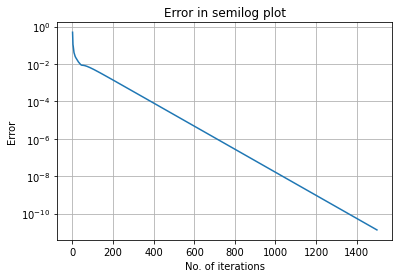

In [227]:
fig,ax = plt.subplots(num =1)
plt.semilogy(i,errors)
plt.xlabel(r'No. of iterations') # Labels
plt.ylabel(r'Error')
plt.title(r'Error in semilog plot')
plt.grid();

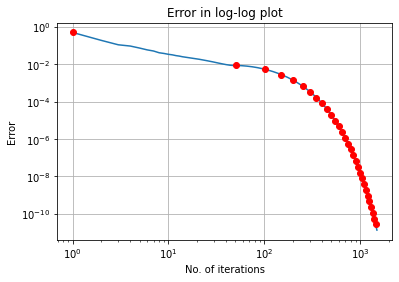

In [228]:
fig,ax = plt.subplots(num =2)
ax.loglog(i,errors, label='Error')
ax.loglog(i[::50],errors[::50], 'ro',label ='Every 50th value')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Error')
plt.title(r'Error in log-log plot')
plt.grid();

In [229]:
error_lstsq = np.exp(np.dot(M,v))

In [230]:
error500_lstsq = np.exp(np.dot(M_500,v_500))

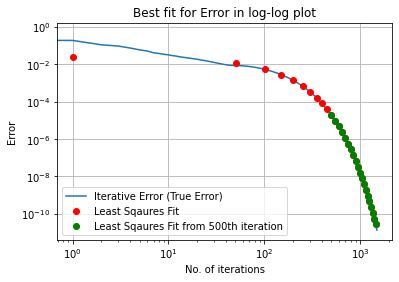

In [231]:
fig,ax = plt.subplots(num =3)
ax.loglog(errors, label='Iterative Error (True Error)')
ax.loglog(i[::50],error_lstsq[::50],'ro', label = 'Least Sqaures Fit')
ax.loglog(i[500::50],error500_lstsq[::50],'go', label = 'Least Sqaures Fit from 500th iteration')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Error')
plt.title(r'Best fit for Error in log-log plot');
plt.legend()
plt.grid();

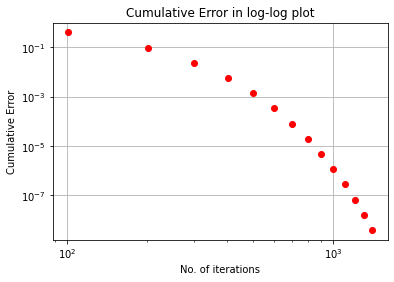

In [232]:
A = np.exp(v[0])
B = v[1]
def cum_error(x):
    return -A/B*np.exp(B*(x+0.5))

fig, ax = plt.subplots(num =4)
ax.loglog(i[100::100],cum_error(i[100::100]),'ro')
plt.xlabel(r'No. of iterations')
plt.ylabel(r'Cumulative Error')
plt.title(r'Cumulative Error in log-log plot')
plt.grid();

<a list of 7 text.Text objects>

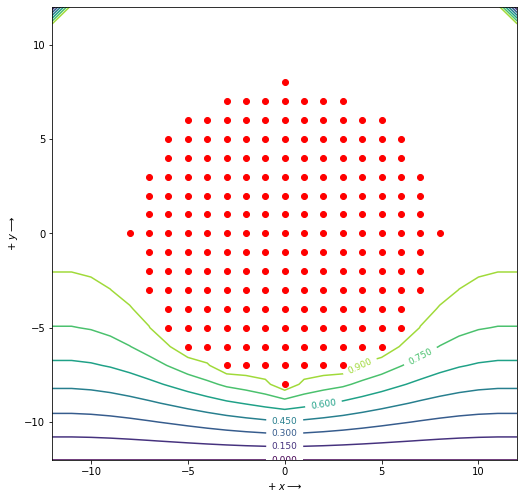

In [233]:
fig,ax = plt.subplots(figsize=(Nx/3,Ny/3),num =5)
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
cs = ax.contour(X,Y,phi)
ax.scatter(ii[1]-(Nx-1)/2,ii[0]-(Ny-1)/2,marker = 'o', color ='r')
ax.clabel(cs, inline =1, fontsize = 9) 

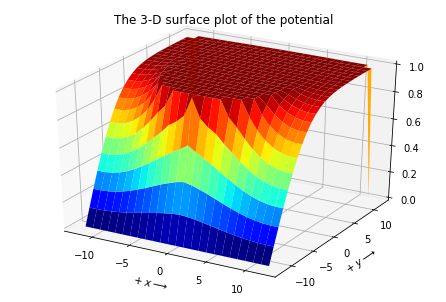

In [234]:
fig1=plt.figure(6)     # open a new figure
ax=p3.Axes3D(fig1) # Axes3D is the means to do a surface plot
plt.title('The 3-D surface plot of the potential')
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
surf = ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap=plt.cm.jet)

In [235]:
Jx = 0.5*(phi[1:-1,:-2]-phi[1:-1,2:]) # 0.5*(phi(x-1,y) - phi(x+1,y)) in cartesian
Jy = 0.5*(phi[2:,1:-1]-phi[:-2,1:-1]) # 0.5*(phi(x, y-1) - phi(x,y+1)) in cartesian

Text(0.5, 1.0, 'Vector plot of current flow')

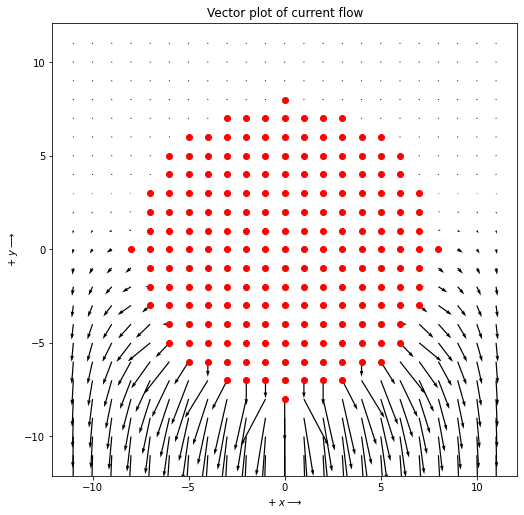

In [237]:
fig,ax = plt.subplots(figsize=(Nx/3,Ny/3),num =7)
ax.quiver(X[1:-1,1:-1],Y[1:-1,1:-1],Jx,Jy)
ax.scatter(ii[1]-(Nx-1)/2,ii[0]-(Ny-1)/2,marker = 'o', color ='r')
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
plt.title('Vector plot of current flow')